1\. **Spotting correlations**

Load the remote file:

```bash
https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
```

with Pandas and create scatter plots with all possible combinations of the following features:
    
  + features_1
  + features_2
  + features_3
  
Are these features correlated?

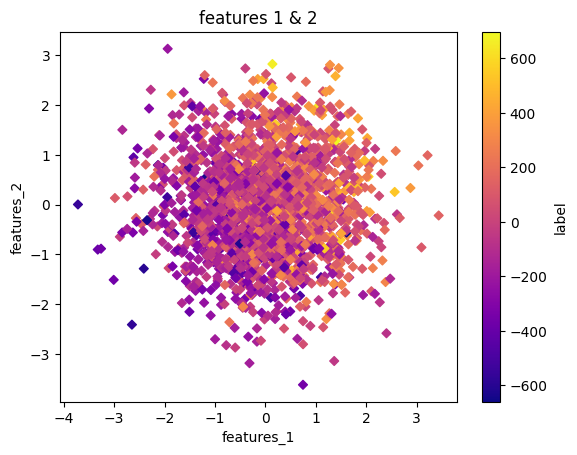

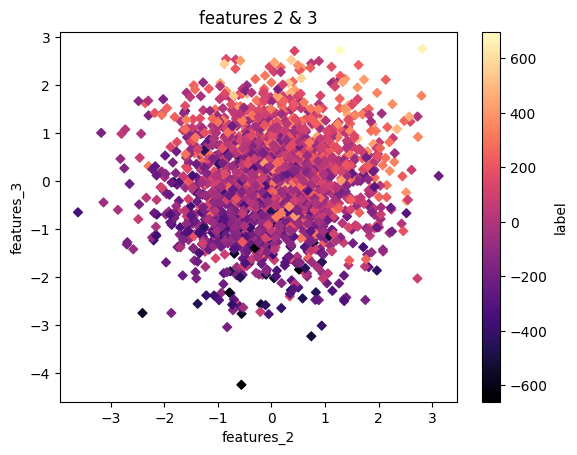

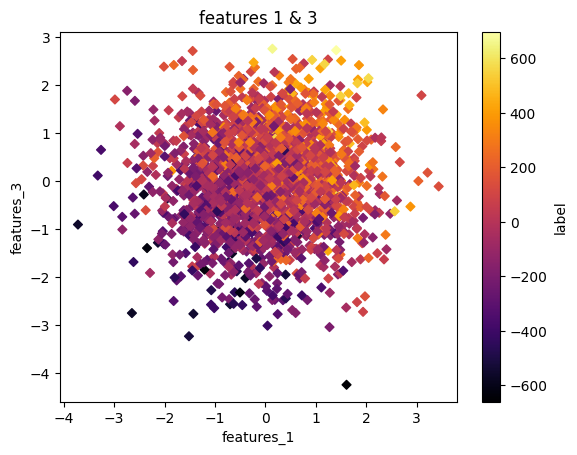

In [117]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.colors as mcolors
import seaborn
import scipy

def ScatterCreator(df, x, y, colorMap, title):
    scatter = df.plot.scatter(x= x, y= y, c='label', colormap= colorMap, marker='D')
    scatter.set_title(title)

df = pd.read_csv("regression_generated.csv",sep = ',')
ScatterCreator(df, 'features_1', 'features_2', 'plasma', 'features 1 & 2')
ScatterCreator(df, 'features_2', 'features_3', 'magma', 'features 2 & 3')
ScatterCreator(df, 'features_1', 'features_3', 'inferno', 'features 1 & 3')

2\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D dataset consisting of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and standard deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

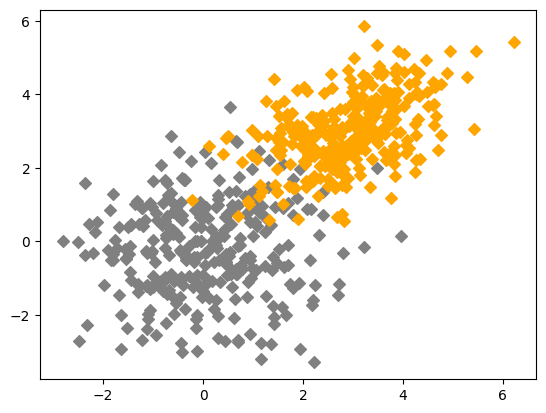

In [71]:
N = 300
def multivariateNormal(mean, cov):
    return np.random.multivariate_normal(mean, cov, N)

x1 = multivariateNormal(np.array([0, 0]), np.array([[1.5, 0], [0, 1.5]]))
x2 = multivariateNormal(np.array([3, 3]), np.array([[1, 0.5], [0.5, 1]]))

plt.figure()
plt.scatter(x1[:,0], x1[:,1], c='gray', marker='D')
plt.scatter(x2[:,0], x2[:,1], c='orange', marker='D')
plt.show()

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn `jointplot` of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

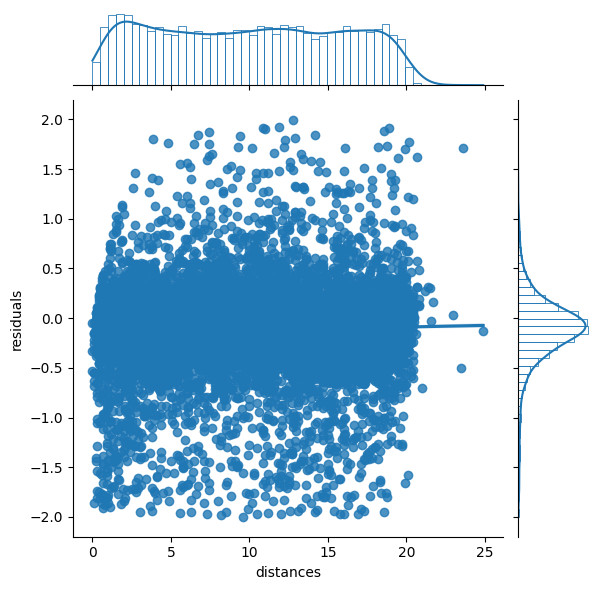

In [106]:
data = pd.read_pickle('residuals_261.pkl')

df = pd.DataFrame(data.item())
df = df.loc[abs(df['residuals']) < 2]

seaborn.jointplot(data= df, x= 'distances', y= 'residuals', kind='reg', marginal_kws=dict(bins=50, fill=False))
plt.show()

x:  [ 1.25  3.75  6.25  8.75 11.25 13.75 16.25 18.75]
y:  [-0.16209792754311064, -0.13453115520958248, -0.09437151580031976, -0.0728359708071407, -0.0994930525401627, -0.14134470218955486, -0.14316205604783885, -0.047012114845945516]
err_y:  [0.4133457442504932, 0.41370234146567647, 0.4434217198579661, 0.4403652040922352, 0.4773371656575184, 0.46643456373295344, 0.4086315389698175, 0.4075713374639706]


<ErrorbarContainer object of 3 artists>

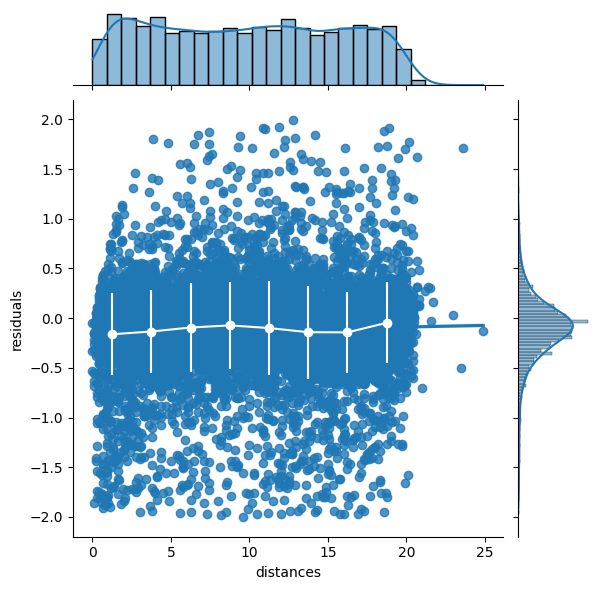

In [113]:
x_borders = np.linspace(0, 20, 9) 
x = (x_borders[1:]+x_borders[:-1]) / 2
print("x: ", x)

dig = np.digitize(df["distances"], x)
y = [df["residuals"][dig == i].mean() for i in range(1, len(x_borders))]
print("y: ", y)

err_y = [df["residuals"][dig == i].std() for i in range(1, len(x_borders))]
print("err_y: ", err_y)

seaborn.jointplot(data=df, x="distances", y="residuals", kind="reg")
plt.errorbar(x=x, y=y, yerr=err_y, marker="o", color="white")

4\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


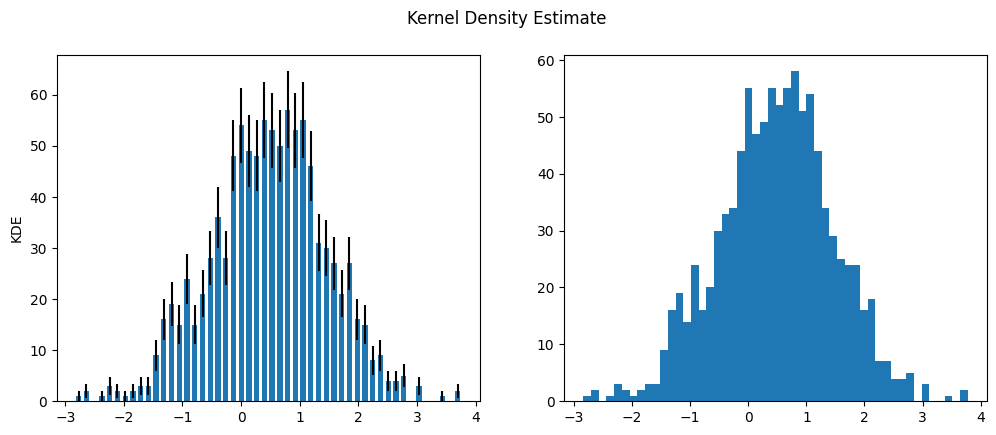

In [131]:
def gaussion():
    gauss = []
    for i in x:
        gauss.append(scipy.stats.norm.rvs(i, sdd, N))  
    return scipy.integrate.trapz(gauss)/N
    
N = 1000
x = np.random.normal(0.5, 1, N)
sdd = 1.06 * x.std() * (N ** (-1/5))
hist, binEdges = np.histogram(x, bins=50)
bincenters = 0.5 * (binEdges[1:] + binEdges[:-1])
std = np.sqrt(hist)

fig, (img1, img2) = plt.subplots(nrows=1, ncols=2, figsize=(12,4.5))

plt.suptitle('Kernel Density Estimate')
img1.bar(bincenters, hist, width=0.09, yerr=std)
img1.set_ylabel('KDE')

img2 = plt.hist(gaussion(), 50)

